In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv(r'C:\Users\HP\Downloads\blinkit_data.csv', encoding='utf-8')

In [5]:
data.shape

(8523, 12)

In [6]:
data.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
data.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

In [9]:
data['Item Weight'] = data['Item Weight'].fillna(0)

In [10]:
data.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,2010.831867,0.066132,10.650590,140.992782,3.965857
std,8.371760,0.051598,6.431899,62.275067,0.605651
min,1998.000000,0.000000,0.000000,31.290000,1.000000
25%,2000.000000,0.026989,6.650000,93.826500,4.000000
50%,2012.000000,0.053931,11.000000,143.012800,4.000000
75%,2017.000000,0.094585,16.000000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


In [11]:
data['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat'], dtype=object)

In [12]:
data['Item Fat Content'] = data['Item Fat Content'].replace({'Low Fat': 'low fat'})

In [13]:
total_sales = data['Sales'].sum()

avg_sales = data['Sales'].mean()

no_item_sold = data['Sales'].count()

ratings = data['Rating'].mean()

print(f"Total sales: ${total_sales:,.0f}")
print(f"Avg sales: ${avg_sales:,.0f}")
print(f"no. of item sold: {no_item_sold:,.0f}")
print(f"Avg Rating: {ratings:,.1f}")

Total sales: $1,201,681
Avg sales: $141
no. of item sold: 8,523
Avg Rating: 4.0


In [14]:
s_fat = data.groupby('Item Fat Content')['Sales'].sum()
s_fat

Item Fat Content
Regular    425361.8024
low fat    776319.6784
Name: Sales, dtype: float64

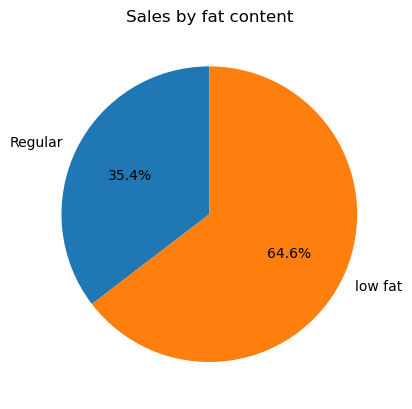

In [15]:
plt.pie(s_fat, labels= s_fat.index, autopct = '%.1f%%', startangle = 90)
plt.title('Sales by fat content')
plt.show()

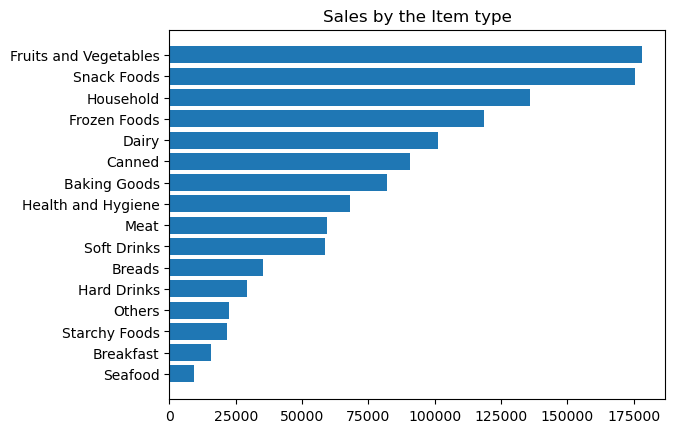

In [16]:
s_item = data.groupby('Item Type')['Sales'].sum().sort_values(ascending =True)
plt.barh(s_item.index, s_item.values)
plt.title('Sales by the Item type')
plt.show()

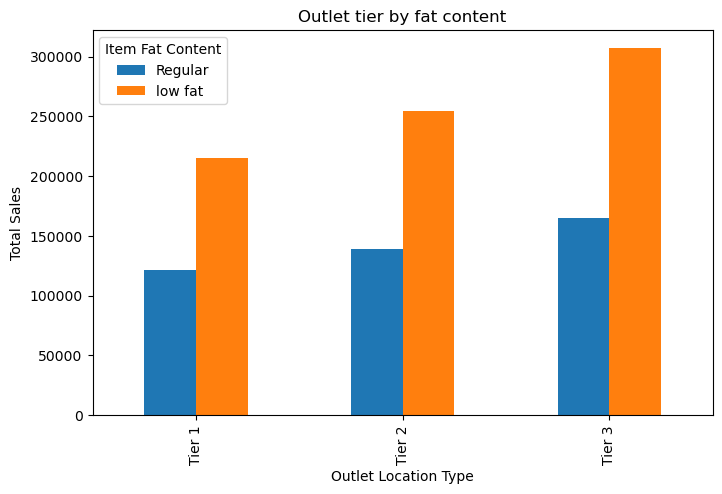

In [17]:
grouped = (data.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack())
#grouped = grouped[['Regular', 'Low fat']]

grouped.plot(kind='bar', figsize=(8,5))
plt.title('Outlet tier by fat content')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.show()

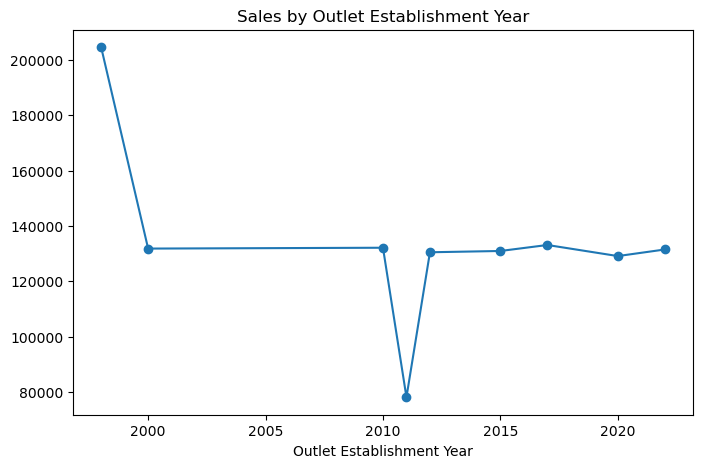

In [18]:
s_year = data.groupby('Outlet Establishment Year')['Sales'].sum()
s_year.plot(kind='line', marker='o', figsize=(8,5))
plt.title('Sales by Outlet Establishment Year')
plt.show()

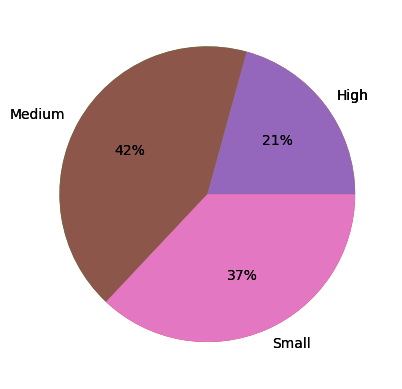

In [23]:
outlet = data.groupby('Outlet Size')['Sales'].sum()
plt.pie(outlet, labels= outlet.index, autopct='%1.f%%')
plt.show()

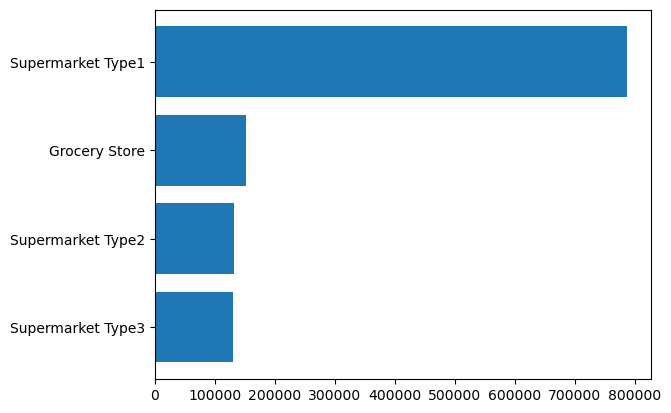

In [31]:
type = data.groupby('Outlet Type')['Sales'].sum().sort_values(ascending=True)
plt.barh(type.index, type.values)
plt.show()

In [36]:
dmean = data['Rating'].mean()


3.965857092573038